#### Create a Page object 

/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics/10.png
/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/output_docscrum/.DS_Store
0.00	0.00	/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics/10.png
Total  704  characters are found.
0.09	0.09	got characters


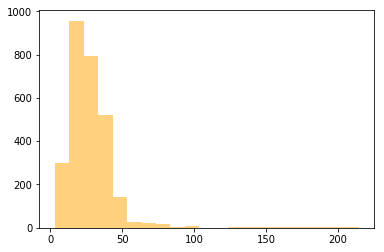

Total 2816 all NNs
('average NN distance: ', 28.15050159941393)


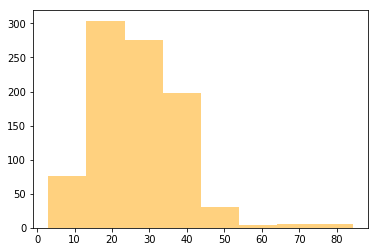

Total 898 hor NNs
Distance peaks: [13, 23, 33, 3, 43, 74, 64, 53]
average NN horizontal distance: 27.19



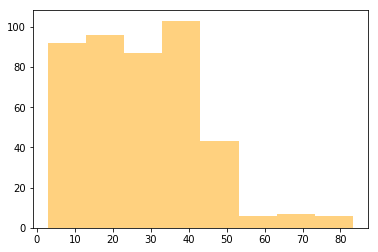

Total 440 ver NNs
Distance peaks: [33, 13, 3, 23, 43, 63, 53, 73, 53, 73]
average NN vertical distance: 27.66

0.95	0.86	got words & tuples
Total  304  words are found.
1.01	0.06	built Docstrum
1.02	0.02	finished analysing page
average time: 1.02

Done.


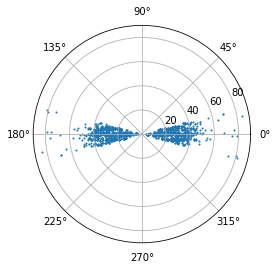

In [2]:
#!/usr/bin/python
# find . -name '.DS_Store' -type f -delete
# Chulwoo Pack

import sys
import os
from page import Page
import sys
import os
from page import Page

import cv2
import math
import numpy
import subprocess
import os

import colors
import geometry as g
from box import Box
import text
from dimension import Dimension
from stopwatch import Stopwatch
import numpy
import matplotlib.pyplot as plt
import ntpath

SHOW_STEPS = False    # change this to false if you just want to see the final output for each page.
SAVE_OUTPUT = False
SAVE_DOCSTRUM = False

inputFolder = os.path.join('/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics')
outputFolder = os.path.join('/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/output_docscrum')
    
inputPath = os.path.join(inputFolder, os.listdir(inputFolder)[1])
outputPath = os.path.join(outputFolder, os.listdir(inputFolder)[0])
print(inputPath)
print(outputPath)
page = Page(inputPath, SHOW_STEPS, SAVE_DOCSTRUM)
#page = Page(inputPath, SHOW_STEPS)
    
if SAVE_OUTPUT:
    page.save(outputPath)  # save a copy of what is displayed. Used for getting images for the paper.
    
page.show((800, 800))

In [3]:
print("%.2f" %1.237)

1.24


In [4]:
# just to make sure that lines are not grouped
for line in page.lines:
    line.group = None

for line in page.lines:
    print(line.group)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


### Getting each line in a group

In [5]:
#NER VERSION: ADJUSTIVE SEARCHING ORDER
import cv2
import math
from shapely.geometry import Point            # For checking overlap
from shapely.geometry.polygon import Polygon  # For checking overlap
from shapely.geometry import MultiPoint       # For checking overlap

import progressbar      # For displaying progressbar
from time import sleep  # For displaying progressbar

#from stopwatch import Stopwatch   # For checking run-time

#stopwatch = Stopwatch()

image = page.image.copy()

EPS = 1e-10
group_idx = 0
threshold_angle = 1.0
threshold_paralldist = 1.7 * 13.0
threshold_perpendist = 1.7 * 17.0 #[1.5~1.7]
threshold_overlap    = 1.0
threshold_early_skip = 100
threshold_visualize_line_width = 5

SHOW_DETAIL      = False
SHOW_VISUAL_STEP = False
EARLY_SKIP       = False

########
# INIT #
########
# Get lines
_my_lines  = page.lines
# Remove dots
my_lines = []
for _my_line in _my_lines:
    if(_my_line.start.x-_my_line.end.x==0 and _my_line.start.y-_my_line.end.y==0):
        continue
    else:
        my_lines.append(_my_line)
# Sorting lines
my_lines.sort(key=lambda line:((line.start.y+line.end.y)/2,(line.start.x+line.end.x)/2))
# Lines assigned a group
my_lines_in_group = []
# Lines not assigned any group yet
my_lines_no_group = []
for i in range(0,len(my_lines)-1):
    my_lines_no_group.append(i)
if SHOW_DETAIL: print("no_group:",my_lines_in_group)
if SHOW_DETAIL: print("in_group:",my_lines_no_group)
# First line, not dot (its index, i)

bar = progressbar.ProgressBar(maxval=len(my_lines_no_group), \
            widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
progress_idx = 0
bar.start()
# print("BAR REMOVED")
max_loop = len(my_lines)
#act_loop = 0

for act_loop in xrange(max_loop): # Make sure looked up every lines   
    #flag_found_none = True
    if ((len(my_lines_in_group) == 0) and (len(my_lines_no_group) == 0)):
        break
    #test_act_loop = test_act_loop+1
    
    progress_idx = progress_idx+2 # Update progressbar
    bar.update(act_loop)      # Update progressbar
    sleep(0.1)
#     print("#BAR PROGRESS STEP#")
    #######################
    # Set the ith element #
    #######################
    i = -1
    if EARLY_SKIP:
        early_skip = threshold_early_skip
    ## TODO: Since, currently there is no lines in my_lines_in_group queue and lines are remained, find another line as ith element in my_lines_no_group queue with excluding dots. 
    if(len(my_lines_in_group) == 0):
        delta_x_i = 0
        delta_y_i = 0
        for candidate_line_idx in my_lines_no_group[:]:
            x_O_i = my_lines[candidate_line_idx].start.x
            y_O_i = page.image.shape[0] - my_lines[candidate_line_idx].start.y
            x_F_i = my_lines[candidate_line_idx].end.x
            y_F_i = page.image.shape[0] - my_lines[candidate_line_idx].end.y 
            #delta_x_i = abs(x_F_i - x_O_i)
            delta_x_i = float(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            if (delta_x_i != 0 and delta_y_i != 0): # Found!
                i = candidate_line_idx
                my_lines_no_group.remove(candidate_line_idx)
                break
    else:
        i = my_lines_in_group.pop(0)
        
    
    # TODO: more sophisticated way to break?
    if (i == -1):
        break
    
    # Visualize ith element
    if SHOW_VISUAL_STEP:
        image = page.image.copy()
        cv2.line(image, ((my_lines[i].start.x,my_lines[i].start.y)),((my_lines[i].end.x,my_lines[i].end.y)), (0,0,255),threshold_visualize_line_width)
        page.display(image, title='Visualization of text-line groupping step')
                                                       
    # No more lines to search
    if (len(my_lines_no_group) == 0):
        break
    else:
        my_lines[i].noise = False  # This assure that dot-wise noise to be excluded from grouping process
        #######################
        # Set the jth element #
        #######################
        for j in my_lines_no_group[:]:
            if EARLY_SKIP:
                if early_skip < 0:
                    break
            if SHOW_VISUAL_STEP:
                cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (255,0,0),threshold_visualize_line_width)
                page.display(image, title='Visualization of text-line groupping step')

            sameGroup = False
            ################################
            # CALCULATE GEOMETRIC FEATURES #
            ################################
            # Point setting
            x_O_i = my_lines[i].start.x
            y_O_i = page.image.shape[0] - my_lines[i].start.y
            x_F_i = my_lines[i].end.x
            y_F_i = page.image.shape[0] - my_lines[i].end.y 

            x_O_j = my_lines[j].start.x
            y_O_j = page.image.shape[0] - my_lines[j].start.y
            x_F_j = my_lines[j].end.x
            y_F_j = page.image.shape[0] - my_lines[j].end.y

            #delta_x_i = abs(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            #delta_x_j = abs(x_F_j - x_O_j)
            #delta_y_j = abs(y_F_j - y_O_j)
            delta_x_i = float(x_F_i - x_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            delta_x_j = float(x_F_j - x_O_j)
            delta_y_j = float(y_F_j - y_O_j)
            
            
            # ith or jth line is dot, so skip it
            if (delta_x_j == 0 and delta_y_j == 0):
                my_lines_no_group.remove(j)
                continue

            if SHOW_DETAIL:
                print("\n****************************************************************")
                print("# of in_group:",len(my_lines_in_group),my_lines_in_group)
                print("# of no_group:",len(my_lines_no_group),my_lines_no_group)
                print(i, my_lines[i].points)
                print(j, my_lines[j].points)
                print("i:",x_O_i,y_O_i,"-",x_F_i,y_F_i)
                print("j:",x_O_j,y_O_j,"-",x_F_j,y_F_j)

            # Calculate angle
            theta_i_j = math.atan2(delta_y_j,delta_x_j-math.atan2(delta_y_i,delta_x_i))
            if SHOW_DETAIL:
                print("Angle:",theta_i_j)

            # Calculate overlap
            #if delta_x_j == 0:
            #    delta_x_j = 0.1
            #if delta_y_i == 0:
            #    delta_y_i = 0.1
            #if delta_y_j == 0:
            #    delta_y_j = 0.1
            #if delta_x_i == 0:
            #    delta_x_i = 0.1


            x_A_j = (x_O_i*delta_x_i*delta_x_j + x_O_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_O_i-y_O_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_A_j = (delta_y_j/delta_x_j)*(x_A_j - x_O_j) + y_O_j
            else:
                x_A_j = y_O_j

            x_B_j = (x_F_i*delta_x_i*delta_x_j + x_F_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_F_i-y_F_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_B_j = (delta_y_j/delta_x_j)*(x_B_j - x_F_j) + y_F_j
            else:
                x_B_j = y_F_j

            # Find C and D ponts
            #x_middle_candidates = [x_O_j, x_F_j, x_A_j, x_B_j]
            #x_middle_candidates.sort()
            #y_middle_candidates = [y_O_j, y_F_j, y_A_j, y_B_j]
            #y_middle_candidates.sort()
            C_D_candidates = [(x_O_j,y_O_j), (x_F_j,y_F_j), (x_A_j,y_A_j), (x_B_j,y_B_j)]
            if (delta_x_j != 0):
                C_D_candidates.sort(key=lambda x:x[0]) # sort by x
            elif (delta_y_j != 0):
                C_D_candidates.sort(key=lambda x:x[1]) # sort by y
            x_C_j,y_C_j = C_D_candidates[1]
            x_D_j,y_D_j = C_D_candidates[2]

            if SHOW_DETAIL:
                print("x_A_j,y_A_j",x_A_j,y_A_j)
                print("x_B_j,y_B_j",x_B_j,y_B_j)
                print("x_C_j,y_C_j",x_C_j,y_C_j)
                print("x_D_j,y_D_j",x_D_j,y_D_j)

            #x_i_j_components = [int(x_O_i), int(x_F_i), int(x_O_j), int(x_F_j)]
            #x_i_j_components.sort()
            #y_i_j_components = [int(y_O_i), int(y_F_i), int(y_O_j), int(y_F_j)]
            #y_i_j_components.sort()
            # convert to int in order to allow generous overlap
            #if ((int(x_O_j) <= int(x_C_j) <= int(x_F_j) and (int(y_O_j) <= int(y_C_j) <= int(y_F_j) or int(y_F_j) <= int(y_C_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_C_j) <= int(x_F_i) and (int(y_O_i) <= int(x_C_j) <= int(y_F_i) or int(y_F_i) <= int(y_C_j) <= int(y_O_i)))) and ((int(x_O_j) <= int(x_D_j) <= int(x_F_j) and (int(y_O_j) <= int(y_D_j) <= int(y_F_j) or int(y_F_j) <= int(y_D_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_D_j) <= int(x_F_i) and (int(y_O_i) <= int(y_D_j) <= int(y_F_i) or int(y_F_i) <= int(y_D_j) <= int(y_O_i)))):
            #if ((x_i_j_components[0] <= int(x_C_j[0]) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_C_j) <= y_i_j_components[-1]) and (x_i_j_components[0] <= int(x_D_j) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_D_j) <= y_i_j_components[-1])):
            #convex_hull = MultiPoint([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            #polygon = Polygon([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)])
            #convex_hull = MultiPoint([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)]).convex_hull
            polygon = Polygon([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            C_point = Point(x_C_j, y_C_j)
            D_point = Point(x_D_j, y_D_j)
            #if polygon.area != convex_hull.area:
            #    overlap = False
            #elif (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            #if (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            if (polygon.contains(C_point) or polygon.touches(C_point)) and (polygon.contains(D_point) or polygon.touches(D_point)):
                overlap = True
            else:
                overlap = False
            
            #p_j = (math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2)))/2.0
            p_j = math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2))
            l_j = math.sqrt(math.pow(y_F_j-y_O_j,2)+math.pow(x_F_j-x_O_j,2))
            if (l_j == 0):
                l_j = 0.1
            if overlap:
                p_i_j = p_j/l_j
            else:
                p_i_j = -p_j/l_j

            if SHOW_DETAIL:
                print("Overlap?",overlap)
                print("p_j:",p_j)
                print("p_i_j:",p_i_j)

            # Calculate parallel_dist
            if overlap:
                d_i_j_a = p_j
            else:
                d_i_j_a = -p_j
            if SHOW_DETAIL:
                print("parallel_dist: ",d_i_j_a)

            # Calculate perpend_dist
            x_M_j = (x_C_j + x_D_j)/2.0
            y_M_j = (y_C_j + y_D_j)/2.0
            if SHOW_DETAIL:
                print("x_M_j,y_M_j",x_M_j,y_M_j)
                print("delta_x_i:",delta_x_i)
                print("delta_y_i:",delta_y_i)
                print("delta_x_j:",delta_x_j)
                print("delta_y_j:",delta_y_j)

            if delta_x_i != 0.0 and delta_y_i != 0.0:
                d_e_i_j = ((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/((delta_x_i**2)/(delta_y_i**2 + EPS) + 1)**0.5 
            elif delta_y_i == 0.0:
                d_e_i_j = int(y_M_j) - int(y_O_i)
            elif delta_x_i == 0.0:
                d_e_i_j = int(x_M_j) - int(x_O_i)
            d_e_i_j = abs(d_e_i_j)

            if SHOW_DETAIL:
                print("perpend_dist: ",d_e_i_j)

            ######################
            # DECIDING GROUPNESS #
            #######################
            # 1. angle check
            if theta_i_j < threshold_angle:
                if SHOW_DETAIL: print("... Angle ok!")
            # 2. perpend_dist check
                if 0 < d_e_i_j < threshold_perpendist:
                    if SHOW_DETAIL: print("... Perpendicular ok!")
            # 3.a. overlap check
            # 3.b. parallel_dist check
                    if ((overlap and p_i_j <= threshold_overlap)):
                        if SHOW_DETAIL: print("... Overlap & p_i_j ok!")
                        # Group!
                        sameGroup = True
                    elif (abs(d_i_j_a) < threshold_paralldist):
                        if SHOW_DETAIL: print("... Parallel ok!")
                        # Group!
                        sameGroup = True

            if SHOW_DETAIL:
                print("same group? ",sameGroup)
            if sameGroup:

                if EARLY_SKIP:
                    early_skip = threshold_early_skip
                if SHOW_DETAIL:
                    print("before group idx: ",group_idx)
                    print("before i's group: ", my_lines[i].group)
                    print("before j's group: ", my_lines[j].group)
                if (my_lines[i].group == None) and (my_lines[j].group == None):
                    if SHOW_DETAIL:
                        print("... case 1")
                    # Assign to a new block
                    group_idx = group_idx + 1
                    my_lines[i].group = group_idx
                    my_lines[j].group = group_idx
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                elif (my_lines[i].group == None):
                    if SHOW_DETAIL: print("... case 2")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[i].group = my_lines[j].group
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                elif (my_lines[j].group == None):
                    if SHOW_DETAIL: print("... case 3")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[j].group = my_lines[i].group
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                if SHOW_DETAIL: print("after group idx: ",group_idx)
                if SHOW_DETAIL: print("after i's group: ", my_lines[i].group)
                if SHOW_DETAIL: print("after j's group: ", my_lines[j].group)
                if SHOW_VISUAL_STEP:
                    cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (0,255,0),threshold_visualize_line_width)
                    page.display(image, title='Visualization of text-line groupping step')
            else:
                if EARLY_SKIP:
                    early_skip = early_skip - 1
            
        if (my_lines[i].noise == False and my_lines[i].group == None):
            group_idx = group_idx + 1
            my_lines[i].group = group_idx
bar.finish()

print("Total iter: [%d/%d]" %(act_loop,max_loop))
print("Done!")

[========================================================================] 100%


Total iter: [125/126]
Done!


In [6]:
my_lines

[<geometry.Line instance at 0x82073f410>,
 <geometry.Line instance at 0x8207450f0>,
 <geometry.Line instance at 0x109150870>,
 <geometry.Line instance at 0x109162500>,
 <geometry.Line instance at 0x820740500>,
 <geometry.Line instance at 0x822e5de10>,
 <geometry.Line instance at 0x820745780>,
 <geometry.Line instance at 0x822d46550>,
 <geometry.Line instance at 0x822d6aa00>,
 <geometry.Line instance at 0x109145e10>,
 <geometry.Line instance at 0x822d5ce10>,
 <geometry.Line instance at 0x820749e60>,
 <geometry.Line instance at 0x82073e910>,
 <geometry.Line instance at 0x822d63be0>,
 <geometry.Line instance at 0x822d4f4b0>,
 <geometry.Line instance at 0x10919f9b0>,
 <geometry.Line instance at 0x82073bb90>,
 <geometry.Line instance at 0x822d36cd0>,
 <geometry.Line instance at 0x820747e10>,
 <geometry.Line instance at 0x8206d6050>,
 <geometry.Line instance at 0x10919fe60>,
 <geometry.Line instance at 0x82073fc80>,
 <geometry.Line instance at 0x82073c370>,
 <geometry.Line instance at 0x822d

### Draw the lines grouped in their respective class (each color is a seperate group)

In [7]:
######################
# Draw Grouped Lines #
######################
import cv2
from dimension import Dimension
image = page.image.copy()
for my_line in my_lines:
    #print(my_line.start.x)
#    print my_line.group
    if my_line.group == None:
        continue
        blue  = 0
        green = 0 
        red   = 0
    else:
        blue = (my_line.group*100)%255
        green = (my_line.group*200)%255
        red = (my_line.group*300)%255
        
    #print(blue,green,red)
    cv2.line(image, (my_line.start.x,my_line.start.y), (my_line.end.x,my_line.end.y), (blue,green,red),10)
    
#cv2.imwrite(outputPath, image) 
maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Draw bouding box over each line segment

In [8]:
#######################
# Draw Bounding Boxes #
#######################
import cv2
import numpy
THRESHOLD_POLY_EXAGGERATE = 10 # Unit: Pixel
image = page.image.copy()
tot_groups = group_idx+1
group_table = []
for group_idx in range(tot_groups):
    group_table.append([])

for my_line in my_lines:
    for group_idx in range(1,tot_groups):
        if my_line.group == None:
            continue
        elif my_line.group == group_idx:
            exaggerated_left_start_x   = my_line.start.x-THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_start_y     = my_line.start.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_start_y   = my_line.start.y-THRESHOLD_POLY_EXAGGERATE
            
            exaggerated_right_end_x    = my_line.end.x+THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_end_y       = my_line.end.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_end_y     = my_line.end.y-THRESHOLD_POLY_EXAGGERATE
            
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_up_start_y])
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_down_start_y])
            
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_up_end_y])
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_down_end_y])
            
            

for group_idx in range(1,tot_groups):
    points = numpy.array(group_table[group_idx-1], dtype='int')
    rect = cv2.minAreaRect(points)
    box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
    box = numpy.int0(box)
    cv2.drawContours(image,numpy.int32([box]),0,(0,0,255),7)
    #convex_hull = cv2.convexHull(points)
    #cv2.polylines(image, numpy.int32([convex_hull]), True, (0, 0, 255), thickness=2)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('Polylines', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Polylines', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
cv2.imwrite(outputPath, image)

In [46]:
group_table

[[[442, 178],
  [442, 158],
  [513, 177],
  [513, 157],
  [494, 192],
  [494, 172],
  [591, 180],
  [591, 160],
  [316, 193],
  [316, 173],
  [462, 193],
  [462, 173]],
 [[624, 178],
  [624, 158],
  [660, 180],
  [660, 160],
  [713, 179],
  [713, 159],
  [745, 180],
  [745, 160],
  [789, 182],
  [789, 162],
  [887, 185],
  [887, 165],
  [624, 188],
  [624, 168],
  [692, 196],
  [692, 176],
  [677, 192],
  [677, 172],
  [801, 194],
  [801, 174],
  [652, 222],
  [652, 202],
  [684, 222],
  [684, 202],
  [699, 228],
  [699, 208],
  [921, 237],
  [921, 217],
  [656, 233],
  [656, 213],
  [708, 233],
  [708, 213],
  [882, 244],
  [882, 224],
  [909, 243],
  [909, 223]],
 [[112, 194], [112, 174], [225, 188], [225, 168]],
 [[447, 232],
  [447, 212],
  [536, 233],
  [536, 213],
  [119, 237],
  [119, 217],
  [294, 232],
  [294, 212],
  [269, 243],
  [269, 223],
  [427, 234],
  [427, 214],
  [121, 248],
  [121, 228],
  [168, 247],
  [168, 227],
  [428, 247],
  [428, 227],
  [472, 247],
  [472, 2

In [31]:
cv2.imwrite(outputPath, image)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgcodecs/src/loadsave.cpp:684: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


### Draw a rectangular box on the region

In [9]:
################################
# Draw BoundingBox (Rectangle) #
################################
import cv2
import numpy
import sys
import os
from page import Page

import cv2
import math
import numpy
import subprocess
import os

import colors
import geometry as g
from box import Box
import text
from dimension import Dimension
from stopwatch import Stopwatch
import numpy
import matplotlib.pyplot as plt
import ntpath

image = page.image.copy()
boundingbox_table = numpy.zeros((group_idx+1,4))  # [min_x,max_x,min_y,max_y]
boundingbox_table[:,0] = image.shape[1]
boundingbox_table[:,1] = 0
boundingbox_table[:,2] = image.shape[0]
boundingbox_table[:,3] = 0

# Find BoundingBoxes for Each Group
for my_line in my_lines:
    for i in range(1,group_idx+1):
        if my_line.group == None:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[-1,0]:
                boundingbox_table[-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[-1,1]:
                boundingbox_table[-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[-1,2]:
                boundingbox_table[-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[-1,3]:
                boundingbox_table[-1,3] = my_line.end.y
        elif my_line.group == i:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[i-1,0]:
                boundingbox_table[i-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,3]:
                boundingbox_table[i-1,3] = my_line.end.y
                
# Draw BoundingBoxes 
for i in range(group_idx+1):
    x_min = int(boundingbox_table[i,0])
    x_max = int(boundingbox_table[i,1])
    y_min = int(boundingbox_table[i,2])
    y_max = int(boundingbox_table[i,3])
    cv2.rectangle(image,(x_min,y_max),(x_max,y_min),(0,0,255),5) # (image, Top-Left, Bottom-Right, BGR_Color, Width)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite(outputPath, image)